# Hacker statistics and probabilistic thinking

In [58]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from pylab import rcParams

rcParams['figure.figsize'] = 12, 6
plt.style.use('ggplot')
pd.set_option('precision', 7)

In [2]:
# Simulation: Probability of tossing 4 coins and that all 4 are heads
all_heads = 0
n = 10000
for _ in range(n):
    heads = np.random.random(size = 4) < 0.5
    n_heads = np.sum(heads)
    if n_heads == 4:
        all_heads += 1
print(all_heads/n)

0.0599


In [3]:
# Bernoulli trials
def perform_bernoulli_trials(n, p):
    """Perform n Bernoulli trials with success probability p
    and return number of successes."""
    n_success = 0
    for i in range(n):
        random_number = np.random.random()
        if random_number < p:
            n_success += 1 
    return n_success
perform_bernoulli_trials(10, 0.3)

1

In [4]:
# The law of large numbers
n = np.array([10,100,1000,10000,100000,1000000, 10000000])
for i in n:
    trial_values= []
    trial= perform_bernoulli_trials(i, 0.5)
    trial_values.append(trial/i)
    print('n=',i,'median=' ,np.median(trial_values))

n= 10 median= 0.7
n= 100 median= 0.47
n= 1000 median= 0.49
n= 10000 median= 0.5033
n= 100000 median= 0.50072
n= 1000000 median= 0.499741
n= 10000000 median= 0.5000773


Let's say a bank made 100 mortgage loans. It is possible that anywhere between 0 and 100 of the loans will be defaulted upon. You would like to know the probability of getting a given number of defaults, given that the probability of a default is p = 0.05. To investigate this, you will do a simulation. You will perform 100 Bernoulli trials using the perform_bernoulli_trials() function you wrote in the previous exercise and record how many defaults we get. Here, a success is a default. (Remember that the word "success" just means that the Bernoulli trial evaluates to True, i.e., did the loan recipient default?) You will do this for another 100 Bernoulli trials. And again and again until we have tried it 1000 times. Then, you will plot a histogram describing the probability of the number of defaults.

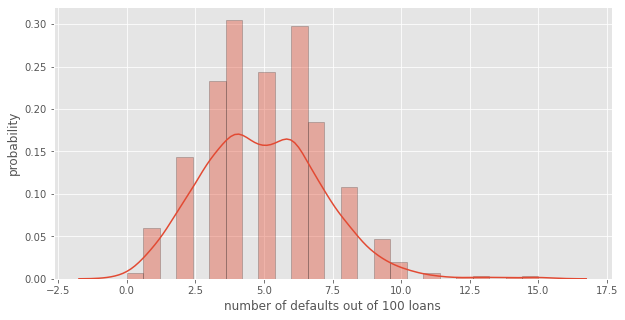

In [5]:
np.random.seed(42)
n=1000
n_defaults =np.empty(n)

for i in range(n):
    n_defaults[i] = perform_bernoulli_trials(100,0.05)
plt.figure(figsize=(10,5))   
_ = sns.distplot(n_defaults, norm_hist=True, hist_kws={'edgecolor':'black'})
_ = plt.xlabel('number of defaults out of 100 loans')
_ = plt.ylabel('probability')

plt.show()

If interest rates are such that the bank will lose money if 10 or more of its loans are defaulted upon, what is the probability that the bank will lose money?

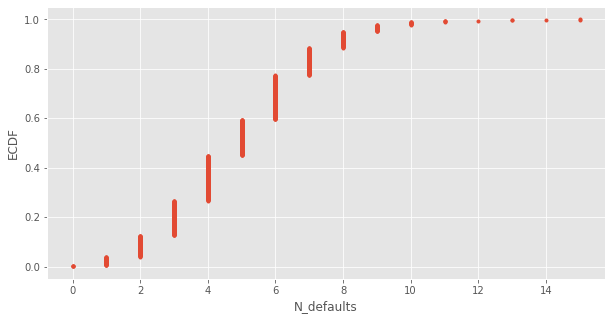

Probability of losing money = 0.022


In [6]:
def ecdf(data):
    n = len(data)
    x = np.sort(data)
    y = np.arange(1, n+1) / n
    return x, y

x, y = ecdf(n_defaults)
plt.figure(figsize=(10,5)) 
plt.plot(x, y, marker='.', linestyle='none')
plt.xlabel('N_defaults')
plt.ylabel('ECDF')
plt.show()

n_lose_money = np.sum(n_defaults>=10)
print('Probability of losing money =', n_lose_money / len(n_defaults))

Plotting the Binomial PMF

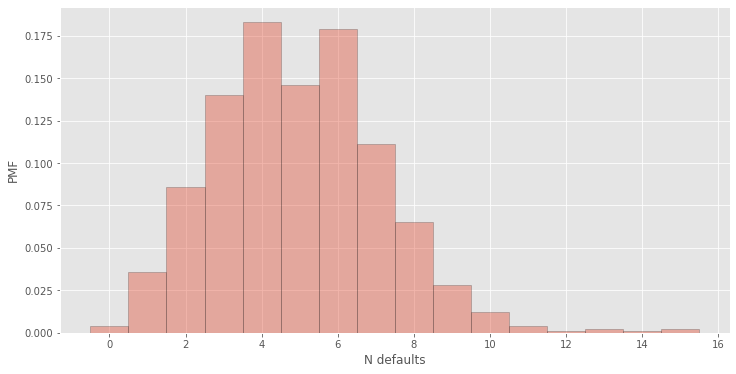

In [7]:
bins = np.arange(0, max(n_defaults) + 1.5) - 0.5
sns.distplot(n_defaults, bins=bins, norm_hist=True, kde=False, hist_kws={'edgecolor':'black'})
plt.xlabel('N defaults')
plt.ylabel('PMF')
plt.show()

In [8]:
michelson_speed_of_light = pd.read_csv('https://assets.datacamp.com/production/repositories/469/datasets/df23780d215774ff90be0ea93e53f4fb5ebbade8/michelson_speed_of_light.csv')
michelson_speed_of_light.drop('Unnamed: 0', axis= 1, inplace = True)

In [9]:
michelson_speed_of_light.head()

,date,distinctness of image,temperature (F),position of deflected image,position of slit,displacement of image in divisions,difference between greatest and least,B,Cor,revolutions per second,radius (ft),value of one turn of screw,velocity of light in air (km/s),remarks
0,June 5,3,76,114.85,0.300,114.55,0.17,1.423,-0.132,257.36,28.672,0.99614,299850,Electric light.
1,June 7,2,72,114.64,0.074,114.56,0.10,1.533,-0.084,257.52,28.655,0.99614,299740,P.M. Frame inclined at various angles
2,June 7,2,72,114.58,0.074,114.50,0.08,1.533,-0.084,257.52,28.647,0.99614,299900,P.M. Frame inclined at various angles
3,June 7,2,72,85.91,0.074,85.84,0.12,1.533,-0.084,193.14,28.647,0.99598,300070,P.M. Frame inclined at various angles
4,June 7,2,72,85.97,0.074,85.89,O.07,1.533,-0.084,193.14,28.650,0.99598,299930,P.M. Frame inclined at various angles


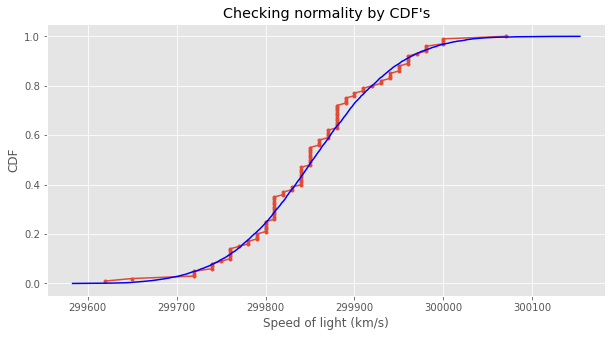

In [10]:
speed = michelson_speed_of_light['velocity of light in air (km/s)']
mean = np.mean(speed)
std = np.std(speed)
sample = np.random.normal(mean, std, size = 10000)
x, y = ecdf(speed)
x_theor, y_theor = ecdf(sample)

plt.figure(figsize = (10,5))
_ = plt.plot(x,y, marker = '.', linestyle = None)
_ = plt.plot(x_theor, y_theor, color = 'blue')
_ = plt.xlabel('Speed of light (km/s)')
_ = plt.ylabel('CDF')
_ = plt.title('Checking normality by CDF\'s')
plt.show()

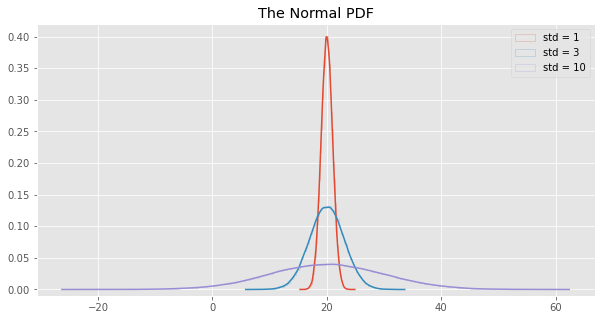

In [11]:
# The Normal PDF
samples_std1 = np.random.normal(20, 1, size=100000)
samples_std3 = np.random.normal(20, 3, size=100000)
samples_std10 = np.random.normal(20, 10, size=100000)

plt.figure(figsize=(10,5))
_ = sns.distplot(samples_std1,  hist_kws={"histtype": "step"}, norm_hist=True, bins=100)
_ = sns.distplot(samples_std3, hist_kws={"histtype": "step"}, norm_hist=True, bins=100)
_ = sns.distplot(samples_std10, hist_kws={"histtype": "step"}, norm_hist=True, bins=100)
_ = plt.title('The Normal PDF')
# Make a legend, set limits and show plot
_ = plt.legend(('std = 1', 'std = 3', 'std = 10'))
plt.ylim(-0.01, 0.42)
plt.show()


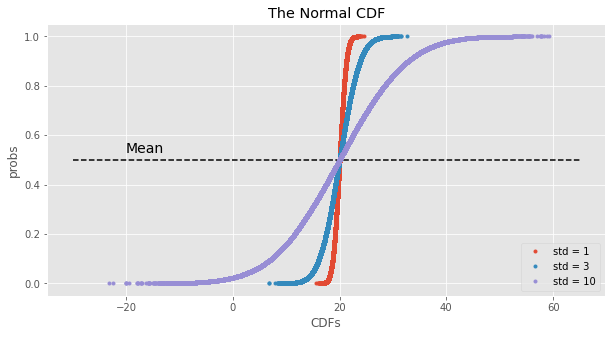

In [12]:
# The Normal CDF
x_std1, y_std1 = ecdf(samples_std1)
x_std3, y_std3 = ecdf(samples_std3)
x_std10, y_std10 = ecdf(samples_std10)

plt.figure(figsize=(10,5))
plt.plot(x_std1, y_std1, marker='.',linestyle='none')
plt.plot(x_std3, y_std3, marker='.',linestyle='none')
plt.plot(x_std10, y_std10, marker='.',linestyle='none')
plt.hlines(0.5, -30,65, linestyle = '--')
plt.text(-20, 0.53, 'Mean', fontsize = 14)

plt.xlabel('CDFs')
plt.ylabel('probs')
plt.title('The Normal CDF')

_ = plt.legend(('std = 1', 'std = 3', 'std = 10'), loc='lower right')
plt.show()


If you have a story, you can simulate it!

In [13]:
def successive_poisson(tau1, tau2, size=1):
    """Compute time for arrival of 2 successive Poisson processes."""
    t1 = np.random.exponential(tau1, size)
    t2 = np.random.exponential(tau2, size)
    return t1 + t2

### Distribution of no-hitters and cycles
Now, you'll use your sampling function to compute the waiting time to observe a no-hitter and hitting of the cycle. The mean waiting time for a no-hitter is 764 games, and the mean waiting time for hitting the cycle is 715 games.

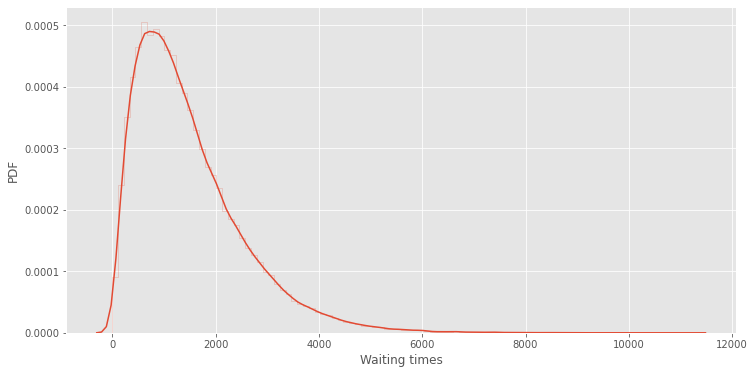

In [14]:
waiting_times = successive_poisson(764,715, size= 100000)

sns.distplot(waiting_times, hist_kws={'histtype': 'step'}, norm_hist=True, bins=100)
plt.xlabel('Waiting times')
plt.ylabel('PDF')

plt.show()

#### How often do we get no-hitters?
The number of games played between each no-hitter in the modern era (1901-2015) of Major League Baseball is stored in the array nohitter_times.

If you assume that no-hitters are described as a Poisson process, then the time between no-hitters is Exponentially distributed. As you have seen, the Exponential distribution has a single parameter, which we will call τ, the typical interval time. The value of the parameter τ that makes the exponential distribution best match the data is the mean interval time (where time is in units of number of games) between no-hitters.

Compute the value of this parameter from the data. Then, use np.random.exponential() to "repeat" the history of Major League Baseball by drawing inter-no-hitter times from an exponential distribution with the τ you found and plot the histogram as an approximation to the PDF.

In [15]:
nohitter_times = np.array([ 843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

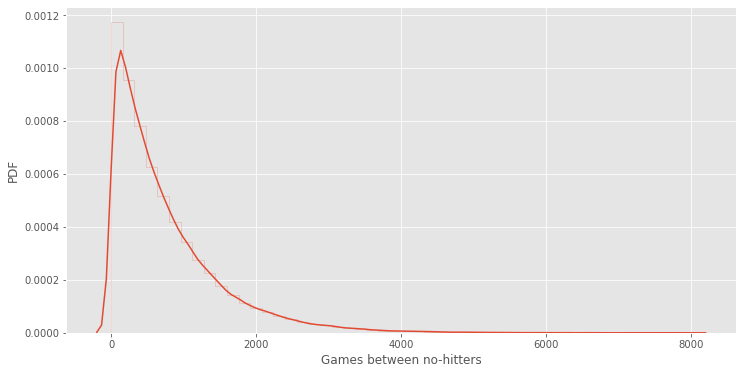

In [16]:
np.random.seed(33)

tau = np.mean(nohitter_times)
inter_nohitter_times = np.random.exponential(tau, 100000)
_ = sns.distplot(inter_nohitter_times, hist_kws= {'histtype' : 'step'}, norm_hist = True, bins = 50)
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')

#### Do the data follow our story?
You have modeled no-hitters using an Exponential distribution. Create an ECDF of the real data. Overlay the theoretical CDF with the ECDF from the data. This helps you to verify that the Exponential distribution describes the observed data.

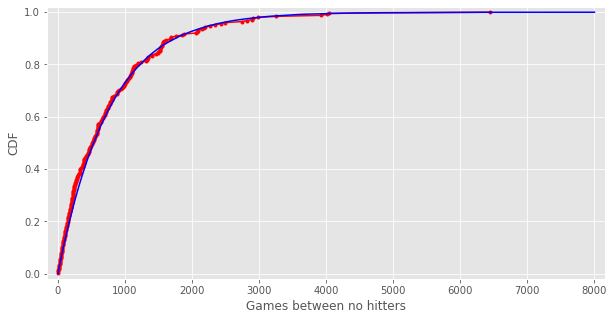

In [17]:
x, y = ecdf(nohitter_times)
x_theor, y_theor = ecdf(inter_nohitter_times)

plt.figure(figsize=(10,5))
_ = plt.plot(x, y, marker = '.', linestyle = None, color = 'red')
_ = plt.plot(x_theor, y_theor, color = 'blue')
_ = plt.margins(0.02)
_ = plt.xlabel('Games between no hitters')
_ = plt.ylabel('CDF')

plt.show()

#### How is this parameter optimal?
Now sample out of an exponential distribution with τ being twice as large as the optimal τ. Do it again for τ half as large. Make CDFs of these samples and overlay them with your data. You can see that they do not reproduce the data as well. Thus, the τ you computed from the mean inter-no-hitter times is optimal in that it best reproduces the data.

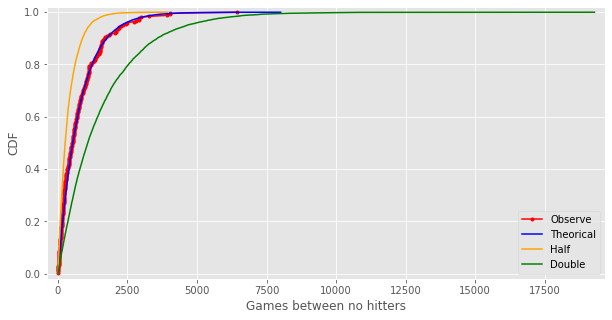

In [18]:
plt.figure(figsize=(10,5))
_ = plt.plot(x, y, marker = '.', linestyle = None, color = 'red', label = 'Observe')
_ = plt.plot(x_theor, y_theor, color = 'blue', label = 'Theorical')
_ = plt.margins(0.02)
_ = plt.xlabel('Games between no hitters')
_ = plt.ylabel('CDF')

samples_half = np.random.exponential(tau/2, 10000)
samples_double = np.random.exponential(tau*2, 10000)

x_half, y_half = ecdf(samples_half)
x_double, y_double = ecdf(samples_double)

_ = plt.plot(x_half, y_half, label = 'Half', color = 'orange')
_ = plt.plot(x_double, y_double, label = 'Double', color = 'green')
_ = plt.legend()

plt.show()

In [19]:
illiteracy = np.array([ 9.5, 49.2,  1. , 11.2,  9.8, 60. , 50.2, 51.2,  0.6,  1. ,  8.5,
        6.1,  9.8,  1. , 42.2, 77.2, 18.7, 22.8,  8.5, 43.9,  1. ,  1. ,
        1.5, 10.8, 11.9,  3.4,  0.4,  3.1,  6.6, 33.7, 40.4,  2.3, 17.2,
        0.7, 36.1,  1. , 33.2, 55.9, 30.8, 87.4, 15.4, 54.6,  5.1,  1.1,
       10.2, 19.8,  0. , 40.7, 57.2, 59.9,  3.1, 55.7, 22.8, 10.9, 34.7,
       32.2, 43. ,  1.3,  1. ,  0.5, 78.4, 34.2, 84.9, 29.1, 31.3, 18.3,
       81.8, 39. , 11.2, 67. ,  4.1,  0.2, 78.1,  1. ,  7.1,  1. , 29. ,
        1.1, 11.7, 73.6, 33.9, 14. ,  0.3,  1. ,  0.8, 71.9, 40.1,  1. ,
        2.1,  3.8, 16.5,  4.1,  0.5, 44.4, 46.3, 18.7,  6.5, 36.8, 18.6,
       11.1, 22.1, 71.1,  1. ,  0. ,  0.9,  0.7, 45.5,  8.4,  0. ,  3.8,
        8.5,  2. ,  1. , 58.9,  0.3,  1. , 14. , 47. ,  4.1,  2.2,  7.2,
        0.3,  1.5, 50.5,  1.3,  0.6, 19.1,  6.9,  9.2,  2.2,  0.2, 12.3,
        4.9,  4.6,  0.3, 16.5, 65.7, 63.5, 16.8,  0.2,  1.8,  9.6, 15.2,
       14.4,  3.3, 10.6, 61.3, 10.9, 32.2,  9.3, 11.6, 20.7,  6.5,  6.7,
        3.5,  1. ,  1.6, 20.5,  1.5, 16.7,  2. ,  0.9])
fertility = np.array([1.769, 2.682, 2.077, 2.132, 1.827, 3.872, 2.288, 5.173, 1.393,
       1.262, 2.156, 3.026, 2.033, 1.324, 2.816, 5.211, 2.1  , 1.781,
       1.822, 5.908, 1.881, 1.852, 1.39 , 2.281, 2.505, 1.224, 1.361,
       1.468, 2.404, 5.52 , 4.058, 2.223, 4.859, 1.267, 2.342, 1.579,
       6.254, 2.334, 3.961, 6.505, 2.53 , 2.823, 2.498, 2.248, 2.508,
       3.04 , 1.854, 4.22 , 5.1  , 4.967, 1.325, 4.514, 3.173, 2.308,
       4.62 , 4.541, 5.637, 1.926, 1.747, 2.294, 5.841, 5.455, 7.069,
       2.859, 4.018, 2.513, 5.405, 5.737, 3.363, 4.89 , 1.385, 1.505,
       6.081, 1.784, 1.378, 1.45 , 1.841, 1.37 , 2.612, 5.329, 5.33 ,
       3.371, 1.281, 1.871, 2.153, 5.378, 4.45 , 1.46 , 1.436, 1.612,
       3.19 , 2.752, 3.35 , 4.01 , 4.166, 2.642, 2.977, 3.415, 2.295,
       3.019, 2.683, 5.165, 1.849, 1.836, 2.518, 2.43 , 4.528, 1.263,
       1.885, 1.943, 1.899, 1.442, 1.953, 4.697, 1.582, 2.025, 1.841,
       5.011, 1.212, 1.502, 2.516, 1.367, 2.089, 4.388, 1.854, 1.748,
       2.978, 2.152, 2.362, 1.988, 1.426, 3.29 , 3.264, 1.436, 1.393,
       2.822, 4.969, 5.659, 3.24 , 1.693, 1.647, 2.36 , 1.792, 3.45 ,
       1.516, 2.233, 2.563, 5.283, 3.885, 0.966, 2.373, 2.663, 1.251,
       2.052, 3.371, 2.093, 2.   , 3.883, 3.852, 3.718, 1.732, 3.928])

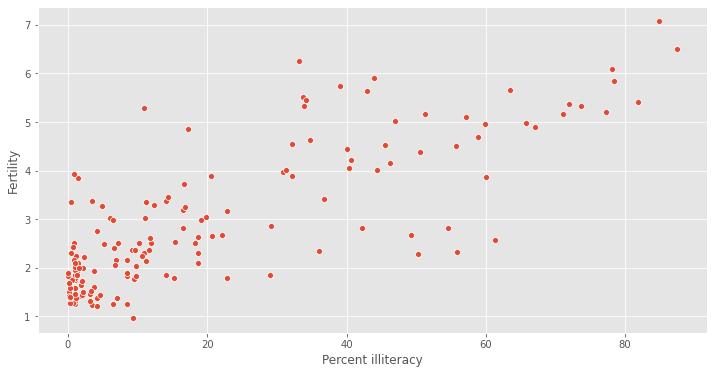

In [20]:
from pylab import rcParams
rcParams['figure.figsize'] = 12, 6
_ = sns.scatterplot(illiteracy, fertility)
_ = plt.xlabel('Percent illiteracy')
_ = plt.ylabel('Fertility')
plt.show()

Linear regression

slope = 0.04979854809063423 children per woman / percent illiterate
intercept = 1.888050610636557 children per woman


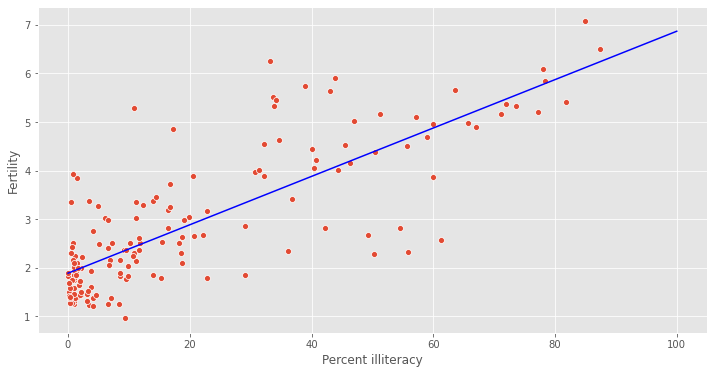

In [21]:
a, b = np.polyfit(illiteracy, fertility,1)

print('slope =', a, 'children per woman / percent illiterate')
print('intercept =', b, 'children per woman')

x = np.array([0,100])
y = a * x + b

_ = sns.scatterplot(illiteracy, fertility)
_ = plt.xlabel('Percent illiteracy')
_ = plt.ylabel('Fertility')

_ = plt.plot(x, y, color = 'blue')

plt.show()

Generating bootstrap replicates

In [22]:
rainfall = np.array([ 875.5,  648.2,  788.1,  940.3,  491.1,  743.5,  730.1,  686.5,
        878.8,  865.6,  654.9,  831.5,  798.1,  681.8,  743.8,  689.1,
        752.1,  837.2,  710.6,  749.2,  967.1,  701.2,  619. ,  747.6,
        803.4,  645.6,  804.1,  787.4,  646.8,  997.1,  774. ,  734.5,
        835. ,  840.7,  659.6,  828.3,  909.7,  856.9,  578.3,  904.2,
        883.9,  740.1,  773.9,  741.4,  866.8,  871.1,  712.5,  919.2,
        927.9,  809.4,  633.8,  626.8,  871.3,  774.3,  898.8,  789.6,
        936.3,  765.4,  882.1,  681.1,  661.3,  847.9,  683.9,  985.7,
        771.1,  736.6,  713.2,  774.5,  937.7,  694.5,  598.2,  983.8,
        700.2,  901.3,  733.5,  964.4,  609.3, 1035.2,  718. ,  688.6,
        736.8,  643.3, 1038.5,  969. ,  802.7,  876.6,  944.7,  786.6,
        770.4,  808.6,  761.3,  774.2,  559.3,  674.2,  883.6,  823.9,
        960.4,  877.8,  940.6,  831.8,  906.2,  866.5,  674.1,  998.1,
        789.3,  915. ,  737.1,  763. ,  666.7,  824.5,  913.8,  905.1,
        667.8,  747.4,  784.7,  925.4,  880.2, 1086.9,  764.4, 1050.1,
        595.2,  855.2,  726.9,  785.2,  948.8,  970.6,  896. ,  618.4,
        572.4, 1146.4,  728.2,  864.2,  793. ])

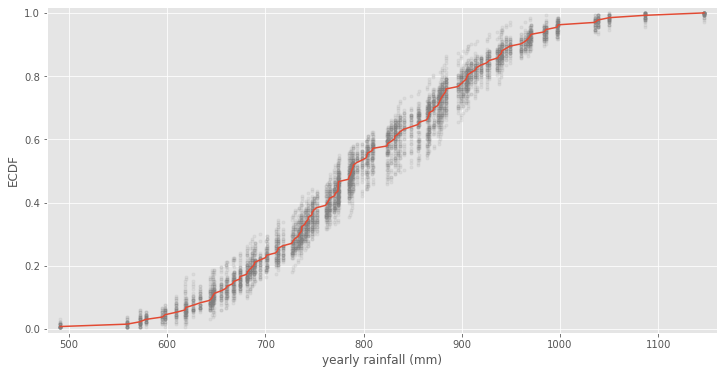

In [23]:
for _ in range(50):
    bs_samples = np.random.choice(rainfall, size = len(rainfall))
    x, y = ecdf(bs_samples)
    _ = plt.plot(x, y , marker = '.', linestyle = 'none', color = 'gray', alpha = 0.1)
    
x, y = ecdf(rainfall)
_ = plt.plot(x, y)
plt.margins(0.02)
_ = plt.xlabel('yearly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()

#### Bootstrap confidence intervals


In [24]:
# Generating many bootstrap replicates
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
    bs_replicates = np.empty(size)
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data, func)
    return bs_replicates

Bootstrap replicates of the mean and the SEM (standard error of the mean)

SEM = 10.510549150506188
STD =  10.497142807971734
CI_95 = [779.13832707 820.39708647]


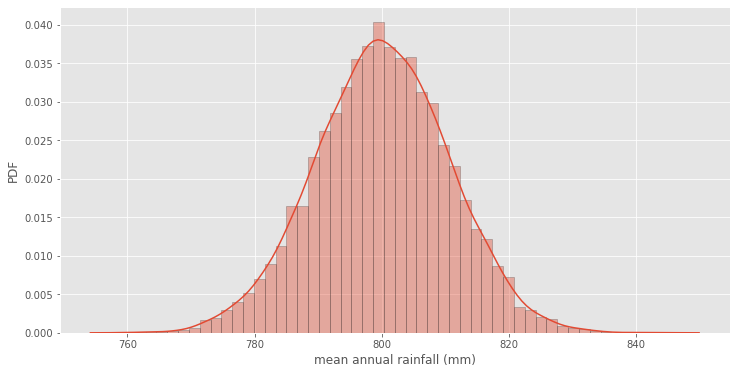

In [25]:
bs_replicates = draw_bs_reps(rainfall, np.mean, 10000)
sem = np.std(rainfall) / np.sqrt(len(rainfall))
print('SEM =' ,sem)
bs_std = np.std(bs_replicates)
print('STD = ', bs_std)
print('CI_95 =', np.percentile(bs_replicates, [2.5, 97.5]))

_ = sns.distplot(bs_replicates, bins=50, norm_hist=True, hist_kws={'edgecolor':'black'})
_ = plt.xlabel('mean annual rainfall (mm)')
_ = plt.ylabel('PDF')

plt.show()



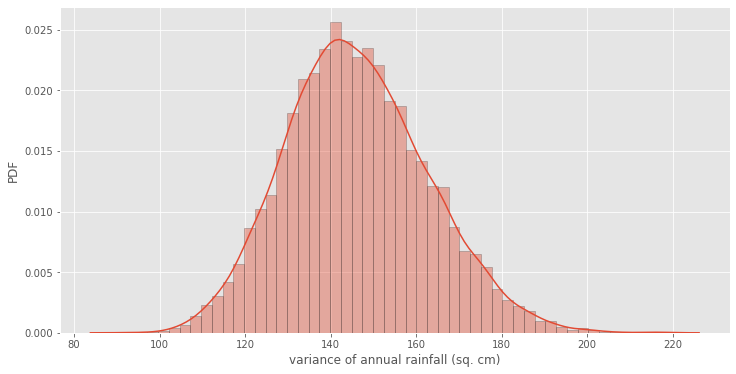

In [26]:
bs_replicates = draw_bs_reps(rainfall, np.var, 10000)
_ = sns.distplot(bs_replicates/100, bins=50, norm_hist=True, hist_kws={'edgecolor':'black'}) #  the variance in units of square centimeters for convenience..
_ = plt.xlabel('variance of annual rainfall (sq. cm)')
_ = plt.ylabel('PDF')
plt.show()

Confidence interval on the rate of no-hitters


95% confidence interval = [661.78027888 867.45039841] games


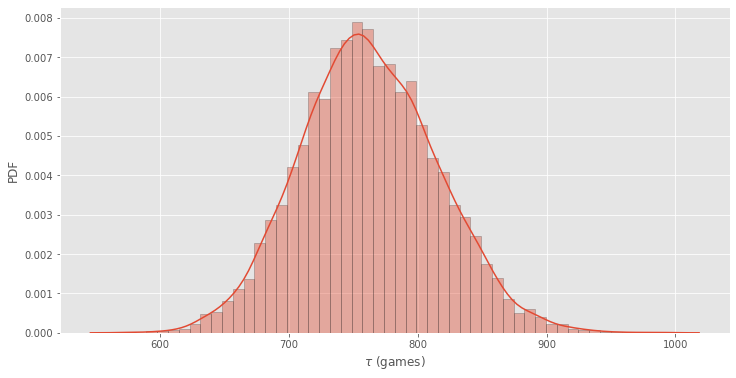

In [27]:
bs_replicates = draw_bs_reps(nohitter_times, np.mean, 10000)
conf_int = np.percentile(bs_replicates, [2.5, 97.5])
print('95% confidence interval =', conf_int, 'games')

_ = sns.distplot(bs_replicates, bins=50, norm_hist=True, hist_kws={'edgecolor':'black'})
_ = plt.xlabel(r'$\tau$ (games)')
_ = plt.ylabel('PDF')
plt.show()


In [28]:
# A function to do pairs bootstrap for linear regression
def draw_bs_pairs_linreg(x, y, size=1):
    """Perform pairs bootstrap for linear regression."""
    inds = len(x)
    bs_slope_reps = np.empty(size)
    bs_intercept_reps = np.empty(size)

    for i in range(size):
        bs_inds = np.random.choice(inds, size=len(x))
        bs_x, bs_y = x[bs_inds], y[bs_inds]
        bs_slope_reps[i], bs_intercept_reps[i] = np.polyfit(bs_x, bs_y,1)

    return bs_slope_reps, bs_intercept_reps

95% confidence interval for slope [0.04432629 0.05552337]


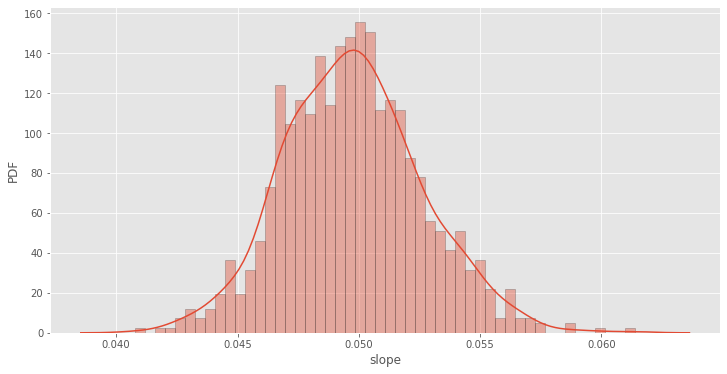

In [29]:
bs_slope_reps, bs_intercept_reps = draw_bs_pairs_linreg(illiteracy, fertility, 1000)
print('95% confidence interval for slope' ,np.percentile(bs_slope_reps, [2.5,97.5]))

_ = sns.distplot(bs_slope_reps, bins = 50, norm_hist = True, hist_kws={'edgecolor':'black'})
_ = plt.xlabel('slope')
_ = plt.ylabel('PDF')
plt.show()


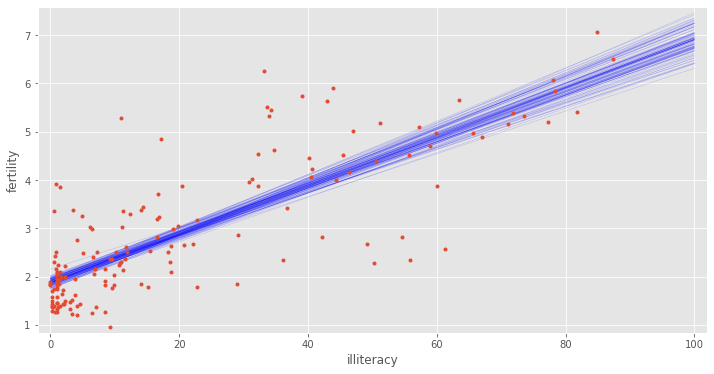

In [30]:
x = np.array([0,100])
for i in range(100):
    _ = plt.plot(x, 
                 bs_slope_reps[i]*x + bs_intercept_reps[i],
                 linewidth=0.5, alpha=0.2, color='blue')

_ = plt.plot(illiteracy, fertility, marker = '.', linestyle = 'none')
_ = plt.xlabel('illiteracy')
_ = plt.ylabel('fertility')
plt.margins(0.02)
plt.show()

#### Introduction-to-hypothesis-testing

In [31]:
# Generating a permutation sample
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
    data = np.concatenate((data1,data2))

    permuted_data = np.random.permutation(data)

    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2

This time considering the monthly rainfall in June (a dry month) and November (a wet month). We expect these might be differently distributed, so we will take permutation samples to see how their ECDFs would look if they were identically distributed.

In [32]:
rain_june = np.array([ 66.2,  39.7,  76.4,  26.5,  11.2,  61.8,   6.1,  48.4,  89.2,
       104. ,  34. ,  60.6,  57.1,  79.1,  90.9,  32.3,  63.8,  78.2,
        27.5,  43.4,  30.1,  17.3,  77.5,  44.9,  92.2,  39.6,  79.4,
        66.1,  53.5,  98.5,  20.8,  55.5,  39.6,  56. ,  65.1,  14.8,
        13.2,  88.1,   8.4,  32.1,  19.6,  40.4,   2.2,  77.5, 105.4,
        77.2,  38. ,  27.1, 111.8,  17.2,  26.7,  23.3,  77.2,  87.2,
        27.7,  50.6,  60.3,  15.1,   6. ,  29.4,  39.3,  56.3,  80.4,
        85.3,  68.4,  72.5,  13.3,  28.4,  14.7,  37.4,  49.5,  57.2,
        85.9,  82.1,  31.8, 126.6,  30.7,  41.4,  33.9,  13.5,  99.1,
        70.2,  91.8,  61.3,  13.7,  54.9,  62.5,  24.2,  69.4,  83.1,
        44. ,  48.5,  11.9,  16.6,  66.4,  90. ,  34.9, 132.8,  33.4,
       225. ,   7.6,  40.9,  76.5,  48. , 140. ,  55.9,  54.1,  46.4,
        68.6,  52.2, 108.3,  14.6,  11.3,  29.8, 130.9, 152.4,  61. ,
        46.6,  43.9,  30.9, 111.1,  68.5,  42.2,   9.8, 285.6,  56.7,
       168.2,  41.2,  47.8, 166.6,  37.8,  45.4,  43.2])
rain_november = np.array([ 83.6,  30.9,  62.2,  37. ,  41. , 160.2,  18.2, 122.4,  71.3,
        44.2,  49.1,  37.6, 114.5,  28.8,  82.5,  71.9,  50.7,  67.7,
       112. ,  63.6,  42.8,  57.2,  99.1,  86.4,  84.4,  38.1,  17.7,
       102.2, 101.3,  58. ,  82. , 101.4,  81.4, 100.1,  54.6,  39.6,
        57.5,  29.2,  48.8,  37.3, 115.4,  55.6,  62. ,  95. ,  84.2,
       118.1, 153.2,  83.4, 104.7,  59. ,  46.4,  50. , 147.6,  76.8,
        59.9, 101.8, 136.6, 173. ,  92.5,  37. ,  59.8, 142.1,   9.9,
       158.2,  72.6,  28. , 112.9, 119.3, 199.2,  50.7,  44. , 170.7,
        67.2,  21.4,  61.3,  15.6, 106. , 116.2,  42.3,  38.5, 132.5,
        40.8, 147.5,  93.9,  71.4,  87.3, 163.7, 141.4,  62.6,  84.9,
        28.8, 121.1,  28.6,  32.4, 112. ,  50. ,  96.9,  81.8,  70.4,
       117.5,  41.2, 124.9,  78.2,  93. ,  53.5,  50.5,  42.6,  47.9,
        73.1, 129.1,  56.9, 103.3,  60.5, 134.3,  93.1,  49.5,  48.2,
       167.9,  27. , 111.1,  55.4,  36.2,  57.4,  66.8,  58.3,  60. ,
       161.6, 112.7,  37.4, 110.6,  56.6,  95.8, 126.8])

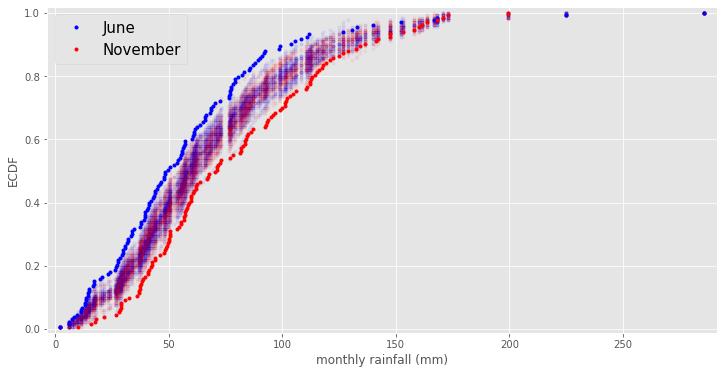

In [33]:
for _ in range(50):
    permutation_sample1, permutation_sample2= permutation_sample(rain_june, rain_november)

    x_1, y_1 = ecdf(permutation_sample1)
    x_2, y_2 = ecdf(permutation_sample2)
    _ = plt.plot(x_1, y_1, marker = '.', linestyle = 'none', alpha = 0.05, color = 'blue')
    _ = plt.plot(x_2, y_2, marker = '.', linestyle = 'none', alpha = 0.05, color = 'red')

x_1, y_1 = ecdf(rain_june)
x_2, y_2 = ecdf(rain_november)
_ = plt.plot(x_1, y_1, marker = '.', linestyle = 'none', label = 'June', color= 'blue')
_ = plt.plot(x_2, y_2, marker = '.', linestyle = 'none', label = 'November', color = 'red')
plt.legend(prop = {'size': 15})
plt.margins(0.02)
_ = plt.xlabel('monthly rainfall (mm)')
_ = plt.ylabel('ECDF')
plt.show()


### T-test and hypothesis-testing

##### What is a p-value?
the probability of observing a test statistic equally or more extreme than the one you observed, given that the null hypothesis is true.

In [34]:
# Generating permutation replicates
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    perm_replicates = np.empty(size)
    for i in range(size):
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)
        perm_replicates[i] = func(perm_sample_1,perm_sample_2)

    return perm_replicates

In [35]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/470/datasets/df6e0479c0f292ce9d2b951385f64df8e2a8e6ac/frog_tongue.csv',
                skiprows=14)[['ID', 'impact force (mN)']]
mapping = {'I':'A', 'II':'B', 'III':'C', 'IV': 'D'}
df.ID = df.ID.map(mapping)
df['impact force (mN)'] = df['impact force (mN)'] / 1000 
df.rename(columns = {'impact force (mN)': 'impact_force'}, inplace = True)

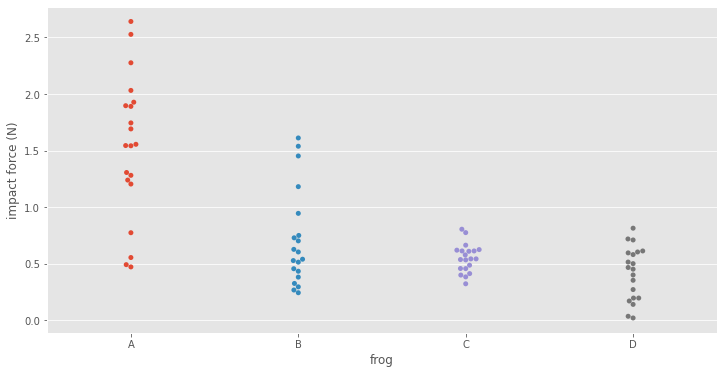

In [36]:
_ = sns.swarmplot(df.ID, df.impact_force)
_ = plt.xlabel('frog')
_ = plt.ylabel('impact force (N)')

plt.show()


it does not look like they come from the same distribution. Frog B, the adult, has three or four very hard strikes, and Frog D, the juvenile, has a couple weak ones. However, it is possible that with only 20 samples it might be too difficult to tell if they have difference distributions, so we should proceed with the hypothesis test

Permutation test on frog data

In [41]:
force_b = df[df.ID == 'B'].impact_force
force_d  = df[df.ID == 'D'].impact_force
print('mean B =', force_b.mean())
print('mean D =', force_d.mean())

mean B = 0.7073500000000001
mean D = 0.4191000000000001


In [40]:
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""

    diff = np.mean(data_1) - np.mean(data_2)

    return diff

In [42]:
empirical_diff_means = diff_of_means(force_b, force_d)
perm_replicates = draw_perm_reps(force_b, force_d,
                                 diff_of_means, size=10000)
p = np.sum(perm_replicates >= empirical_diff_means) / len(perm_replicates)
print('p-value =', p)

p-value = 0.005


##### A one-sample bootstrap hypothesis test
To set up the bootstrap hypothesis test, you will take the mean as our test statistic. Remember, your goal is to calculate the probability of getting a mean impact force less than or equal to what was observed for Frog D if the hypothesis that the true mean of Frog D's impact forces is equal to that of Frog C is true. You first translate all of the data of Frog B such that the mean is 0.55 N. This involves adding the mean force of Frog C and subtracting the mean force of Frog B from each measurement of Frog D. This leaves other properties of Frog D's distribution, such as the variance, unchanged.

In [43]:
translate_force_d= force_d - np.mean(force_d) + df[df.ID == 'C'].impact_force.mean()
bs_replicates  = draw_bs_reps(translate_force_d, np.mean, 10000)
p = np.sum(bs_replicates <= np.mean(force_d)) / 10000
print('P-value= ',p)

P-value=  0.0044


The low p-value suggests that the null hypothesis that Frog B and Frog C have the same mean impact force is false.

##### A two-sample bootstrap hypothesis test for difference of means
We now want to test the hypothesis that Frog B and Frog D have the same mean impact force, but not necessarily the same distribution, which is also impossible with a permutation test.

To do the two-sample bootstrap test, we shift both arrays to have the same mean, since we are simulating the hypothesis that their means are, in fact, equal. We then draw bootstrap samples out of the shifted arrays and compute the difference in means. This constitutes a bootstrap replicate, and we generate many of them. The p-value is the fraction of replicates with a difference in means greater than or equal to what was observed.

In [44]:
mean_forces = np.mean(np.concatenate((force_b, force_d)))

In [45]:
force_b_shifted = force_b - np.mean(force_b) + mean_forces
force_d_shifted = force_d - np.mean(force_d) + mean_forces

bs_replicates_b = draw_bs_reps(force_b_shifted, np.mean, 10000)
bs_replicates_d  = draw_bs_reps(force_d_shifted, np.mean, 10000)

bs_replicates = bs_replicates_b - bs_replicates_d

p = np.sum(bs_replicates >= empirical_diff_means) / len(bs_replicates)
print('P-value =', p)

P-value = 0.0047


#### A/B Testing
##### The vote for the Civil Rights Act in 1964
The Civil Rights Act of 1964 was one of the most important pieces of legislation ever passed in the USA. Excluding "present" and "abstain" votes, 153 House Democrats and 136 Republicans voted yea. However, 91 Democrats and 35 Republicans voted nay. Did party affiliation make a difference in the vote?

In [46]:
dems = np.array([True] * 153 + [False] * 91)
reps = np.array([True] * 136 + [False] * 35)

def frac_yea_dems(dems, reps):
    frac = np.sum(dems) / len(dems)
    return frac

permutation_replicates = draw_perm_reps(dems, reps, frac_yea_dems, 10000)
p = np.sum(permutation_replicates <= 155/244) / len(permutation_replicates)
print('P-value =',p)

P-value = 0.001


This small p-value suggests that party identity had a lot to do with the voting. Importantly, the South had a higher fraction of Democrat representatives, and consequently also a more racist bias.

#### A time-on-website analog
It turns out that you already did a hypothesis test analogous to an A/B test where you are interested in how much time is spent on the website before and after an ad campaign. The frog tongue force (a continuous quantity like time on the website) is an analog. "Before" = Frog B and "after" = Frog D. Let's practice this again with something that actually is a before/after scenario.

We return to the no-hitter data set. In 1920, Major League Baseball implemented important rule changes that ended the so-called dead ball era. Importantly, the pitcher was no longer allowed to spit on or scuff the ball, an activity that greatly favors pitchers. In this problem you will perform an A/B test to determine if these rule changes resulted in a slower rate of no-hitters (i.e., longer average time between no-hitters) using the difference in mean inter-no-hitter time as your test statistic. The inter-no-hitter times for the respective eras are stored in the arrays nht_dead and nht_live, where "nht" is meant to stand for "no-hitter time."


In [47]:
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])
nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

In [52]:
nht_diff_obs = diff_of_means(nht_dead, nht_live)
perm_replicates = draw_perm_reps(nht_dead, nht_live, diff_of_means, 10000)
p = np.sum(perm_replicates <= nht_diff_obs) / len(perm_replicates)
print('p-value =', p)

p-value = 0.0001


P-value is 0.0001, which means that only one out of your 10,000 replicates had a result as extreme as the actual difference between the dead ball and live ball eras. This suggests strong statistical significance. Watch out, though, you could very well have gotten zero replicates that were as extreme as the observed value. This just means that the p-value is quite small, almost certainly smaller than 0.001.

##### Hypothesis test on Pearson correlation
The observed correlation between female illiteracy and fertility may just be by chance; the fertility of a given country may actually be totally independent of its illiteracy. You will test this hypothesis. To do so, permute the illiteracy values but leave the fertility values fixed. This simulates the hypothesis that they are totally independent of each other. For each permutation, compute the Pearson correlation coefficient and assess how many of your permutation replicates have a Pearson correlation coefficient greater than the observed one.

In [60]:
def pearson_r(data1,data2):
    coor = np.corrcoef(data1, data2)[0,1]
    return coor

r_obs = pearson_r(illiteracy, fertility)

permutation_replicates = draw_perm_reps(illiteracy,fertility, pearson_r, 100000)
p = np.sum(permutation_replicates >= r_obs) / len(permutation_replicates)
print('P-value =', p)

P-value = 0.0


A p-value of zero. In hacker statistics, this means that your p-value is very low, since you never got a single replicate in the 10,000 you took that had a Pearson correlation greater than the observed one. You could try increasing the number of replicates you take to continue to move the upper bound on your p-value lower and lower.

##### Do neonicotinoid insecticides have unintended consequences?
As a final exercise in hypothesis testing before we put everything together in our case study in the next chapter, you will investigate the effects of neonicotinoid insecticides on bee reproduction. These insecticides are very widely used in the United States to combat aphids and other pests that damage plants.

In a recent study, Straub, et al. (Proc. Roy. Soc. B, 2016) investigated the effects of neonicotinoids on the sperm of pollinating bees. In this and the next exercise, you will study how the pesticide treatment affected the count of live sperm per half milliliter of semen.

In [67]:
df = pd.read_csv('https://assets.datacamp.com/production/repositories/470/datasets/e427679d28d154934a6c087b2fa945bc7696db6d/bee_sperm.csv',
                skiprows=3)

In [68]:
df.head()

,Specimen,Treatment,Environment,TreatmentNCSS,Sample ID,Colony,Cage,Sample,Sperm Volume per 500 ul,Quantity,ViabilityRaw (%),Quality,Age (d),Infertil,AliveSperm,Quantity Millions,Alive Sperm Millions,Dead Sperm Millions
0,227,Control,Cage,1,C2-1-1,2,1,1,2150000,2150000,96.7263814616756,96.7263815,14,0,2079617,2.1500,2.079617,0.070383
1,228,Control,Cage,1,C2-1-2,2,1,2,2287500,2287500,96.3498079760595,96.3498080,14,0,2204001,2.2875,2.204001,0.083499
2,229,Control,Cage,1,C2-1-3,2,1,3,87500,87500,98.75,98.7500000,14,0,86406,0.0875,0.086406,0.001094
3,230,Control,Cage,1,C2-1-4,2,1,4,1875000,1875000,93.2874208336941,93.2874208,14,0,1749139,1.8750,1.749139,0.125861
4,231,Control,Cage,1,C2-1-5,2,1,5,1587500,1587500,97.7925061050061,97.7925061,14,0,1552456,1.5875,1.552456,0.035044


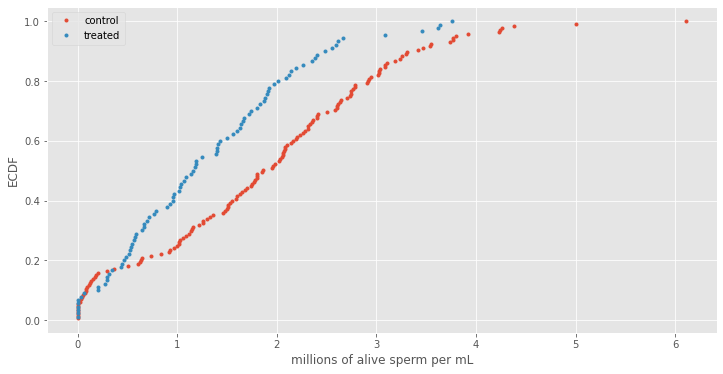

In [78]:
control = df[df.Treatment == 'Control']['Alive Sperm Millions']
treated = df[df.Treatment == 'Pesticide']['Alive Sperm Millions']

x_control, y_control = ecdf(control)
x_treated, y_treated = ecdf(treated)

_ = plt.plot(x_control, y_control, marker = '.', linestyle = 'none')
_ = plt.plot(x_treated, y_treated, marker = '.', linestyle = 'none')

plt.legend(('control', 'treated'))
plt.xlabel('millions of alive sperm per mL')
plt.ylabel('ECDF')
plt.show()

The ECDFs show a pretty clear difference between the treatment and control; treated bees have fewer alive sperm.

In [79]:
# Bootstrap hypothesis test on bee sperm counts
diff_means = diff_of_means(control, treated)
mean_count = np.mean(np.concatenate((control,treated)))

control_shifted = control - np.mean(control) + mean_count
treated_shifted = treated - np.mean(treated) + mean_count

bs_reps_control = draw_bs_reps(control_shifted,
                       np.mean, size=10000)
bs_reps_treated = draw_bs_reps(treated_shifted,
                       np.mean, size=10000)

bs_replicates = bs_reps_control - bs_reps_treated

p = np.sum(bs_replicates >= diff_means) / len(bs_replicates)
print('P-value =', p)

P-value = 0.0


The p-value is small, most likely less than 0.0001, since you never saw a bootstrap replicated with a difference of means at least as extreme as what was observed.

**************************************************************************************************

### A case study

Every year for the past 40-plus years, Peter and Rosemary Grant have gone to the Galápagos island of Daphne Major and collected data on Darwin's finches. Using your skills in statistical inference, you will spend this chapter with their data, and witness first hand, through data, evolution in action

##### EDA of beak depths of Darwin's finches
For your first foray into the Darwin finch data, you will study how the beak depth (the distance, top to bottom, of a closed beak) of the finch species Geospiza scandens has changed over time. The Grants have noticed some changes of beak geometry depending on the types of seeds available on the island, and they also noticed that there was some interbreeding with another major species on Daphne Major, Geospiza fortis. These effects can lead to changes in the species over time.

In the next few problems, you will look at the beak depth of G. scandens on Daphne Major in 1975 and in 2012

In [99]:
finch_beaks_1975 = pd.read_csv('https://assets.datacamp.com/production/repositories/470/datasets/eb228490f7d823bfa6458b93db075ca5ccd3ec3d/finch_beaks_1975.csv')
finch_beaks_2012 = pd.read_csv('https://assets.datacamp.com/production/repositories/470/datasets/b28d5bf65e38460dca7b3c5c0e4d53bdfc1eb905/finch_beaks_2012.csv')

In [109]:
# Speacie = Scandens
bdepth_1975 = pd.DataFrame(finch_beaks_1975[finch_beaks_1975.species == 'scandens']['Beak depth, mm'])
bdepth_1975['year'] = 1975
bdepth_1975.rename(columns = {'Beak depth, mm':'bdepth'}, inplace = True)

bdepth_2012 = pd.DataFrame(finch_beaks_2012[finch_beaks_2012.species == 'scandens'].bdepth)
bdepth_2012['year'] = 2012

bdepth = pd.concat([bdepth_1975, bdepth_2012], axis = 0)

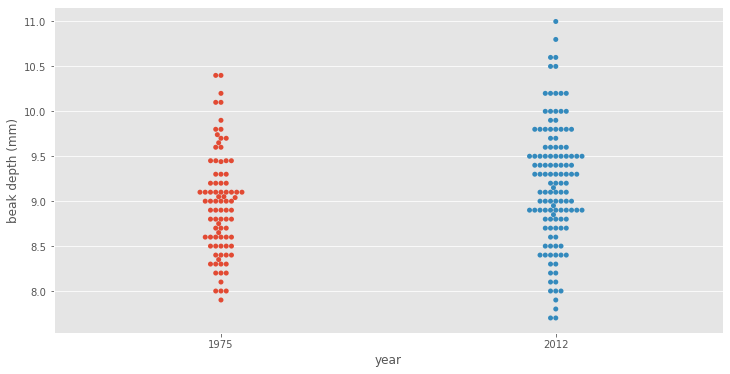

In [110]:
_ = sns.swarmplot(bdepth.year, bdepth.bdepth)
_ = plt.xlabel('year')
_ = plt.ylabel('beak depth (mm)')

plt.show()

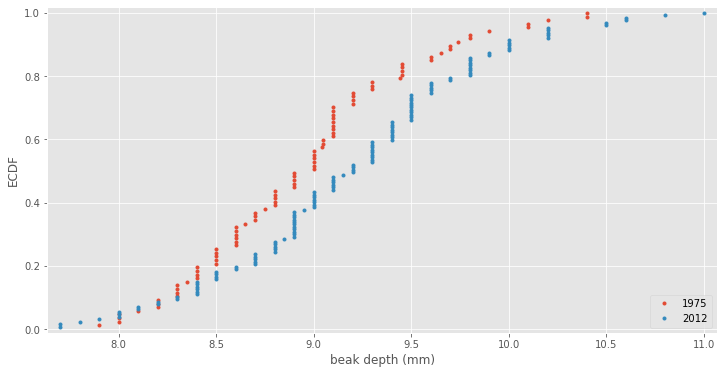

In [111]:
x_1975, y_1975 = ecdf(bdepth_1975.bdepth)
x_2012, y_2012 = ecdf(bdepth_2012.bdepth)

_ = plt.plot(x_1975, y_1975, marker='.', linestyle='none')
_ = plt.plot(x_2012, y_2012, marker='.', linestyle='none')

plt.margins(.02)

_ = plt.xlabel('beak depth (mm)')
_ = plt.ylabel('ECDF')
_ = plt.legend(('1975', '2012'), loc='lower right')

plt.show()

The differences are much clearer in the ECDF. The mean is larger in the 2012 data, and the variance does appear larger as well.

In [115]:
mean_diff = diff_of_means(bdepth_2012.bdepth, bdepth_1975.bdepth)

bs_replicates_1975 = draw_bs_reps(bdepth_1975.bdepth, np.mean, 10000) 
bs_replicates_2012 = draw_bs_reps(bdepth_2012.bdepth, np.mean, 10000)
bs_replicates = bs_replicates_2012 - bs_replicates_1975

conf_int = np.percentile(bs_replicates, [20.5,97.5])

print('difference of means =', mean_diff, 'mm')
print('95% confidence interval =', conf_int, 'mm')

difference of means = 0.22622047244094645 mm
95% confidence interval = [0.15420245 0.39469642] mm


#### Are beaks deeper in 2012?
Is it possible that this effect is just due to random chance? In other words, what is the probability that we would get the observed difference in mean beak depth if the means were the same?

Be careful! The hypothesis we are testing is not that the beak depths come from the same distribution. For that we could use a permutation test. The hypothesis is that the means are equal. To perform this hypothesis test, we need to shift the two data sets so that they have the same mean and then use bootstrap sampling to compute the difference of means.

In [118]:
combined_means = np.mean(np.concatenate((bdepth_1975.bdepth, bdepth_2012.bdepth)))

bd_1975_shifted = bdepth_1975.bdepth - np.mean(bdepth_1975.bdepth) + combined_means
bd_2012_shifted = bdepth_2012.bdepth - np.mean(bdepth_2012.bdepth) + combined_means

bs_1975_replicates = draw_bs_reps(bd_1975_shifted, np.mean, 10000)
bs_2012_replicates = draw_bs_reps(bd_2012_shifted, np.mean, 10000)

bs_replicates = bs_2012_replicates - bs_1975_replicates

p = np.sum(bs_replicates >= mean_diff) / len(bs_replicates)
print('P-value =', p)


P-value = 0.0042


We get a p-value of 0.0042, which suggests that there is a statistically significant difference. But remember: it is very important to know how different they are!
Changing by 0.2 mm in 37 years is substantial by evolutionary standards. If it kept changing at that rate, the beak depth would double in only 400 years.

##### Beak length and depth

In [135]:
scandens_2012 = pd.DataFrame(finch_beaks_2012[finch_beaks_2012.species == 'scandens'])
scandens_2012['year']  = 2012
scandens_2012.reset_index(inplace=True)

scandens_1975 = pd.DataFrame(finch_beaks_1975[finch_beaks_1975.species == 'scandens'])
scandens_1975['year'] = 1975
scandens_1975.rename(columns = {'Beak length, mm':'blength', 'Beak depth, mm':'bdepth'}, inplace=True)
scandens_1975.reset_index(inplace = True)

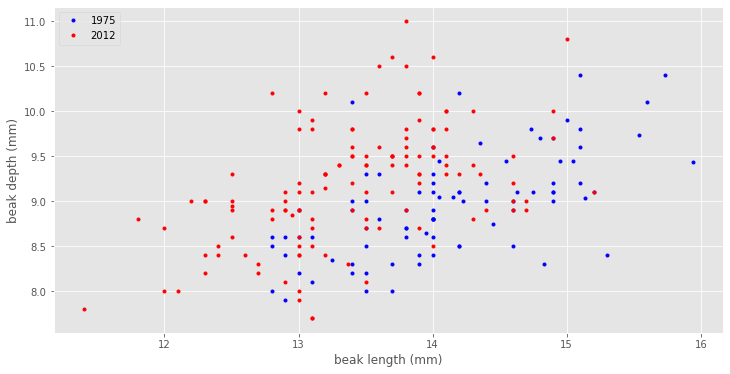

In [137]:
_ = plt.plot(scandens_1975.blength, scandens_1975.bdepth, marker = '.', linestyle = 'none', color = 'blue')
_ = plt.plot(scandens_2012.blength, scandens_2012.bdepth, marker = '.', linestyle = 'none', color = 'red')

_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

#### Linear regressions
Perform a linear regression for both the 1975 and 2012 data. Then, perform pairs bootstrap estimates for the regression parameters. Report 95% confidence intervals on the slope and intercept of the regression line.

In [148]:
slope_1975, intercept_1975 = np.polyfit(scandens_1975.blength, scandens_1975.bdepth, 1)
slope_2012, intercept_2012 = np.polyfit(scandens_2012.blength, scandens_2012.bdepth, 1)

bs_slope_reps_1975, bs_intercept_reps_1975 = \
draw_bs_pairs_linreg(scandens_1975.blength, scandens_1975.bdepth, 1000)
bs_slope_reps_2012, bs_intercept_reps_2012 = \
            draw_bs_pairs_linreg(scandens_2012.blength, scandens_2012.bdepth, 1000)

slope_conf_int_1975 = np.percentile(bs_slope_reps_1975, [2.5, 97.5])
slope_conf_int_2012 = np.percentile(bs_slope_reps_2012, [2.5, 97.5])

intercept_conf_int_1975 = np.percentile(bs_intercept_reps_1975, [2.5, 97.5])
intercept_conf_int_2012 = np.percentile(bs_intercept_reps_2012, [2.5, 97.5])

print('1975: slope =', slope_1975,
      'conf int =', slope_conf_int_1975)
print('1975: intercept =', intercept_1975,
      'conf int =', intercept_conf_int_1975)
print('2012: slope =', slope_2012,
      'conf int =', slope_conf_int_2012)
print('2012: intercept =', intercept_2012,
      'conf int =', intercept_conf_int_2012)

1975: slope = 0.4652051691605937 conf int = [0.33593493 0.58689038]
1975: intercept = 2.3908752365842263 conf int = [0.68526548 4.1828117 ]
2012: slope = 0.462630358835313 conf int = [0.33931348 0.60808729]
2012: intercept = 2.9772474982360198 conf int = [1.07097118 4.62565524]


It looks like they have the same slope, but different intercepts.

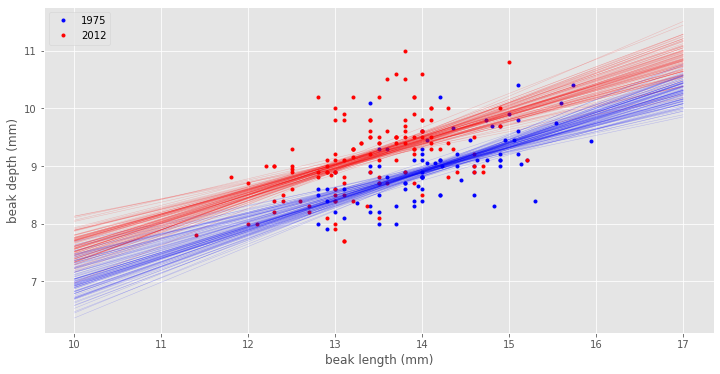

In [149]:
_ = plt.plot(scandens_1975.blength, scandens_1975.bdepth, marker = '.', linestyle = 'none', color = 'blue')
_ = plt.plot(scandens_2012.blength, scandens_2012.bdepth, marker = '.', linestyle = 'none', color = 'red')

_ = plt.xlabel('beak length (mm)')
_ = plt.ylabel('beak depth (mm)')
_ = plt.legend(('1975', '2012'), loc='upper left')

x = np.array([10,17])
for i in range(100):
    _ = plt.plot(x, bs_slope_reps_1975[i]* x + bs_intercept_reps_1975[i],
                 linewidth = 0.5, alpha = 0.2, color = 'blue')
    _ = plt.plot(x, bs_slope_reps_2012[i]* x + bs_intercept_reps_2012[i],
                 linewidth = 0.5, alpha = 0.2, color = 'red')
plt.show()

##### Beak length to depth ratio
The linear regressions showed interesting information about the beak geometry. The slope was the same in 1975 and 2012, suggesting that for every millimeter gained in beak length, the birds gained about half a millimeter in depth in both years. However, if we are interested in the shape of the beak, we want to compare the ratio of beak length to beak depth. Let's make that comparison.

In [151]:
ratio_1975 = scandens_1975.blength / scandens_1975.bdepth
ratio_2012 = scandens_2012.blength / scandens_2012.bdepth

mean_ratio_1975 = np.mean(ratio_1975)
mean_ratio_2012 = np.mean(ratio_2012)

bs_replicates_1975 = draw_bs_reps(ratio_1975, np.mean, 10000)
bs_replicates_2012 = draw_bs_reps(ratio_2012, np.mean, 10000)

conf_int_1975 = np.percentile(bs_replicates_1975, [0.5, 99.5])
conf_int_2012 = np.percentile(bs_replicates_2012, [0.5, 99.5])

print('1975: mean ratio =', mean_ratio_1975,
      'conf int =', conf_int_1975)
print('2012: mean ratio =', mean_ratio_2012,
      'conf int =', conf_int_2012)

1975: mean ratio = 1.5788823771858533 conf int = [1.55592877 1.60102053]
2012: mean ratio = 1.4658342276847767 conf int = [1.44453373 1.4872462 ]


*******************************************************************************************************